### Importing packages

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import metrics

import matplotlib.pyplot as plt

### Setting the random seed to get same results everytime.

In [43]:
np.random.seed(2)

### reading and preparing the dataset

In [44]:
data = pd.read_csv('../data/cropharvest-crop-detection/train.csv', index_col=0)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62000 entries, 0 to 61999
Columns: 217 entries, S2_B2_jan to LABELS
dtypes: float64(217)
memory usage: 103.1 MB


In [46]:
data.head()

,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec,LABELS
0,-14.271277,-21.134172,957.531174,1019.557045,1230.022834,1435.138891,1693.702270,1805.411109,1891.557355,2020.567257,...,2203.025469,795.862978,2747.777894,1688.997611,289.382220,0.000147,1886.384195,0.749163,0.307887,0.0
1,-12.341429,-14.744978,949.227883,895.845779,987.517322,1350.496916,1930.239804,2048.686546,2375.680146,2259.903290,...,2922.382762,1140.796180,2528.590979,1934.261859,266.578370,0.002876,69.876216,1.385904,0.097779,1.0
2,-12.317847,-17.026201,1087.616069,1086.401035,1185.755955,1529.674085,1858.981635,1904.667487,2082.954737,2115.713139,...,2548.726966,521.102434,1556.082048,741.212901,276.467873,0.001622,91.279743,2.125908,0.418492,1.0
3,-15.332478,-20.978203,2987.224569,3163.553102,3412.572434,3908.443371,4044.232162,4231.353770,3682.709329,4518.882323,...,2537.545246,1073.588565,2388.141112,1367.682434,276.101799,0.003720,767.817294,8.427714,0.336528,1.0
4,-11.739502,-11.374262,691.825857,782.111227,478.448214,976.753128,3189.134129,3813.893119,3861.824527,4174.591554,...,4276.302643,371.861994,2080.641023,692.730434,298.663246,0.001763,61.500923,1.203899,0.595404,1.0


### Splitting the dataset to train and validation datasets.

In [47]:
data = data.values


inds = np.arange(data.shape[0])
np.random.shuffle(inds)
num_train = int(0.8 * data.shape[0])
train_inds = inds[:num_train]
val_inds = inds[num_train:]

trainset = data[train_inds] 
valset = data[val_inds]


train_X = trainset[:, :-1]
train_y = trainset[:, -1]

val_X = valset[:, :-1]
val_y = valset[:, -1]

# Random Forest with Grid Searching

In [7]:
param_grid = {
    "n_estimators": [100, 1000],
    "min_samples_leaf": [3, 5, 11, 30],
    "bootstrap": [False, True]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid).fit(train_X, train_y)

y_pred = clf.predict(val_X)
print('accuracy:', clf.score(val_X, val_y))
print('balanced_accuracy_score:', balanced_accuracy_score(y_pred, val_y))
print('confusion_matrix:\n', confusion_matrix(val_y, y_pred))
print('fr_score:', f1_score(val_y, y_pred))

accuracy: 0.8503225806451613
balanced_accuracy_score: 0.8397271366185519
confusion_matrix:
 [[3060 1151]
 [ 705 7484]]
fr_score: 0.8896814075130764


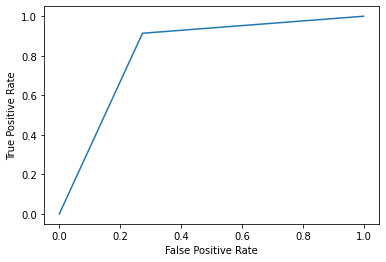

In [48]:
# Plotting ROC curve 
fpr, tpr, _ = metrics.roc_curve(val_y,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc_curve.png', dpi=300)

In [49]:
print('best_params:', clf.best_params_)

best_params: {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 1000}


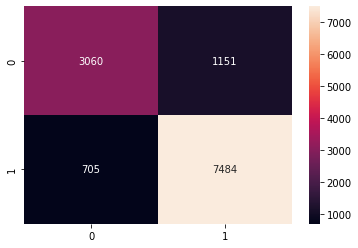

In [50]:
conf_matrix = confusion_matrix(val_y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.savefig('conf_matrix.png', dpi = 300)

# Making predictions and saving the results in CSV file

In [51]:
test_data = pd.read_csv('../data/cropharvest-crop-detection/test_nolabels.csv', index_col=0)

In [52]:
test_data.head()

,S2_B2_jan,S2_B3_jan,S2_B4_jan,S2_B5_jan,S2_B6_jan,S2_B7_jan,S2_B8_jan,S2_B8A_jan,S2_B9_jan,S2_B11_jan,...,S2_B9_dec,S2_B11_dec,S2_B12_dec,S1_VV_dec,S1_VH_dec,ERA5_temperature_2m_dec,ERA5_total_precipitation_dec,topo_elevation_dec,topo_slope_dec,NDVI_dec
S.No,,,,,,,,,,,,,,,,,,,,,
0,-17.649477,-24.327178,1111.603354,1190.158872,1361.861147,1436.238138,1350.277481,1382.111848,1419.716749,1410.456550,...,777.782928,966.513644,467.731680,1045.355257,633.790963,296.952437,0.000092,276.466775,0.765980,0.000600
1,-14.559686,-19.936119,1764.795592,1856.603435,2156.740323,2633.317506,2731.894209,2878.742338,2621.323845,3201.553256,...,2026.702042,2292.479225,791.909589,2902.059945,1728.924349,298.468523,0.000139,187.130317,2.598537,0.217297
2,-14.208844,-21.404320,1210.320260,1246.028476,1523.531488,1706.652761,2014.364032,2198.544215,2277.422666,2547.302707,...,2103.697056,2369.819453,893.709359,3217.008133,2158.612101,298.045025,0.000104,324.857357,0.758805,0.230539
3,-13.895412,-21.169488,1550.755198,1541.339240,1732.355678,1828.669115,1876.796177,2001.004560,1996.979443,2212.820792,...,2101.697185,2372.614882,841.326953,3259.568699,1979.892417,298.534272,0.000130,184.338553,1.132985,0.214938
4,-11.562658,-13.594914,1171.571568,1143.268311,1296.423152,1376.878830,1488.835033,1530.996415,1667.407479,1737.091382,...,1926.708518,2116.367142,849.233731,2550.935276,1457.042276,298.389238,0.000113,261.577366,0.759891,0.220560


In [53]:
test_data = test_data.values

In [54]:
clf_predicts = clf.predict(test_data)

In [55]:
# Looking at the predictions:
print('class 0: ', len(clf_predicts[clf_predicts == 0]))
print('class 1: ', len(clf_predicts[clf_predicts == 1]))

class 0:  522
class 1:  678


In [56]:
# Saving the predictions:
df = pd.DataFrame(clf_predicts.astype(int), columns = ['LABELS'])
df.insert(0, 'S.No', np.array([i for i in range(len(test_data))]))
df.to_csv('tmp_results.csv', index=False)